# Identification of Key Genes in DEX stimulation
Goals: <br>
+ identify key genes for further analysis 
+ group genes into different catagories 
+ make list for undergrads to look into
+ do it for two datasets

Explore A1-2 dataset <br>
+ Have time series data for both bulk and single cell





Explore U2OS dataset: <br>
+ S4u => basically the hourly rate of change



In [1]:
import scanpy as sc
import scvi
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

/home/formanj/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/home/formanj/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
/home/formanj/miniconda3/envs/scvi-env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/formanj/miniconda3/envs/scvi-env/lib/python3.9/site-packages/flax/struct.py:132: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future r

# A1-2 Single Cell

In [12]:
adata_a12 = sc.read_text('/home/formanj/Desktop/UpDown_Project/Datasets/DUSP1/A1-2_sc_Bulk_GSE141834/GSE141834_scRNAseq_seuratV3_normalized.txt').T

In [17]:
np.any(adata_a12.X < 0)

# from this and what I read online, we are in a normalized log space

False

In [25]:
adata_a12.obs['Timepoint'] = [x.split('.')[1] for x in adata_a12.obs_names]
adata_a12.obs['Treatment'] = [x.split('.')[0] for x in adata_a12.obs_names]

adata_a12.obs['Timepoint'] = adata_a12.obs['Timepoint'].astype('category')
adata_a12.obs['Treatment'] = adata_a12.obs['Treatment'].astype('category')

In [26]:
adata_a12.obs

,Timepoint,Treatment
Dex.00.2_AGGTTATCGCCTATATAC,00,Dex
Dex.00.2_CTATTACTATTAGTCCTA,00,Dex
Dex.00.2_CAAGTCATCCGGGGACGA,00,Dex
Dex.00.2_ACCTTCTAATAGTGCTAA,00,Dex
Dex.00.2_TCGCCTAAAGAACATAGA,00,Dex
...,...,...
Dex.18.2_TGCGGTAGGTTAACGGAC,18,Dex
Dex.18.2_TGAGACCTGTGGTCATCA,18,Dex
Dex.18.2_TAGAGGGGCCATAGGTTA,18,Dex
Dex.18.2_TCGGGACACCACCAGGAG,18,Dex


In [27]:
adata_a12_dex = adata_a12[adata_a12.obs['Treatment'] == 'Dex']

In [28]:
adata_a12_dex.uns['Timepoints'] = set(adata_a12_dex.obs['Timepoint'])
adata_a12_dex.uns['Timepoints'] = list(adata_a12_dex.uns['Timepoints'])
adata_a12_dex.uns['Timepoints'].sort()

adata_a12_dex.uns['avg_DUSP1'] = []
adata_a12_dex.uns['var_DUSP1'] = []
for timepoint in adata_a12_dex.uns['Timepoints']:
    adata_a12_dex.uns['avg_DUSP1'].append(adata_a12_dex[adata_a12_dex.obs['Timepoint'] == timepoint].X.mean())
    adata_a12_dex.uns['var_DUSP1'].append(np.var(adata_a12_dex[adata_a12_dex.obs['Timepoint'] == timepoint].X))





/tmp/ipykernel_142055/70187213.py:1: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata_a12_dex.uns['Timepoints'] = set(adata_a12_dex.obs['Timepoint'])


In [29]:
adata_a12_dex.uns['Timepoints']

['00', '01', '02', '04', '08', '18']

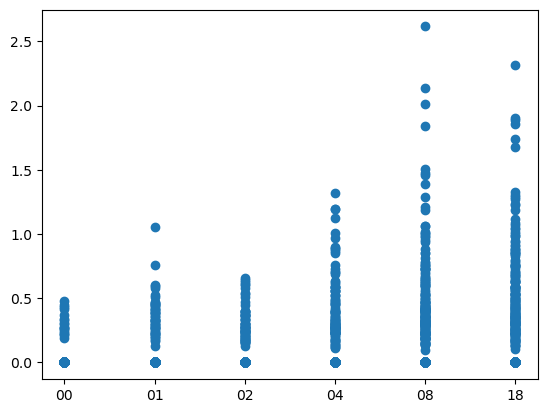

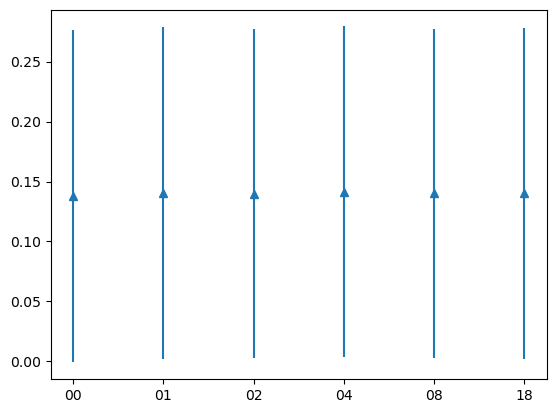

In [30]:
plt.scatter(adata_a12_dex.obs['Timepoint'], adata_a12_dex[:, 'DUSP1'].X)
plt.show()

#plt.scatter(list(adata_a12_dex.uns['Timepoints']), adata_a12_dex.uns['avg_DUSP1'], linestyle='None', marker='^')
plt.errorbar(list(adata_a12_dex.uns['Timepoints']), adata_a12_dex.uns['avg_DUSP1'], adata_a12_dex.uns['var_DUSP1'], linestyle='None', marker='^')
plt.show()

: 